# **Introduction**

![heart.jpg](https://epmgaa.media.clients.ellingtoncms.com/img/photos/2020/04/09/heart_t750x550.jpg?d885fc46c41745b3b5de550c70336c1b382931d2)

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol. The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity. These “intermediate risks factors” can be measured in primary care facilities and indicate an increased risk of heart attack, stroke, heart failure and other complications.

*Reference [here](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1)*

# **Importing packages**

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from numpy import random

from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# **About Dataset**

**Age:** age of the patient [years]

**Sex:** sex of the patient [M: Male, F: Female]

**ChestPainType:** chest pain type 

*   TA: Typical Angina
*   ATA: Atypical Angina
*   NAP: Non-Anginal Pain
*   ASY: Asymptomatic

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar

*   1: FastingBS over 120 mg/dl
*   0: otherwise

**RestingECG:** resting electrocardiogram results

*   Normal: Normal
*   ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment

*   Up: upsloping
*   Flat: flat
*   Down: downsloping

**HeartDisease:** output class 

*   0: Normal
*   1: heart disease

# **Reading the dataset**

In [226]:
dataset = pd.read_csv('heart.csv', sep = ',')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [227]:
#Convert the categoricals objects to int

dataset['Sex'].replace(to_replace=["M", "F"], value = [0, 1], inplace = True)
dataset['ChestPainType'].replace(to_replace=["ASY", "TA", "ATA", "NAP"], value = [0, 1, 2, 3], inplace = True)
dataset['RestingECG'].replace(to_replace=["Normal", "ST", "LVH"], value = [0, 1, 2], inplace = True)
dataset['ExerciseAngina'].replace(to_replace=["N", "Y"], value = [0, 1], inplace = True)
dataset['ST_Slope'].replace(to_replace=["Up", "Flat", "Down"], value = [0, 1, 2], inplace = True)

**New categories to the columns**

**Sex:** 0 - Male / 1 - Female

**ChestPainType:**  0 - ASY / 1 - TA / 2 - ATA / 3 - NAP

**RestingECG:** 0 - Normal / 1 - ST / 2 - LVH

**ExerciseAngina:** 0 - No / 1 - Yes

**ST_Slope:** 0 - Up / 1 - Flat / 2 - Down

In [228]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,0,0
1,49,1,3,160,180,0,0,156,0,1.0,1,1
2,37,0,2,130,283,0,1,98,0,0.0,0,0
3,48,1,0,138,214,0,0,108,1,1.5,1,1
4,54,0,3,150,195,0,0,122,0,0.0,0,0


In [229]:
dataset.shape

(918, 12)

In [230]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [231]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [232]:
dataset.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.090414,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,1.267622,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Text(0, 0.5, 'Total')

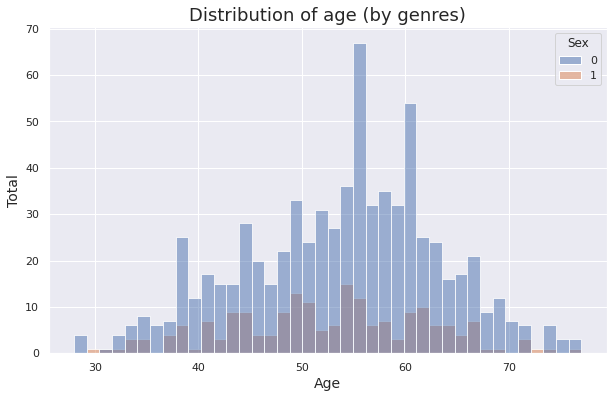

In [233]:
ax = sns.histplot(data = dataset, x = 'Age', hue = 'Sex', bins = 40, color='r')
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of age (by genres)', fontsize = 18)
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

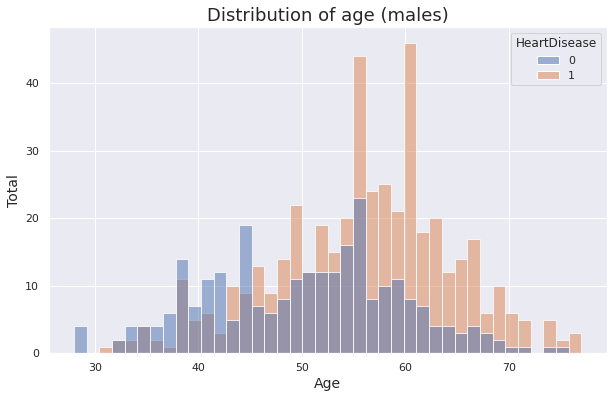

In [234]:
ax = sns.histplot(data = dataset.query('Sex == 0'), x = 'Age', hue = 'HeartDisease', bins = 40, color='r')
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of age (males)', fontsize = 18)
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

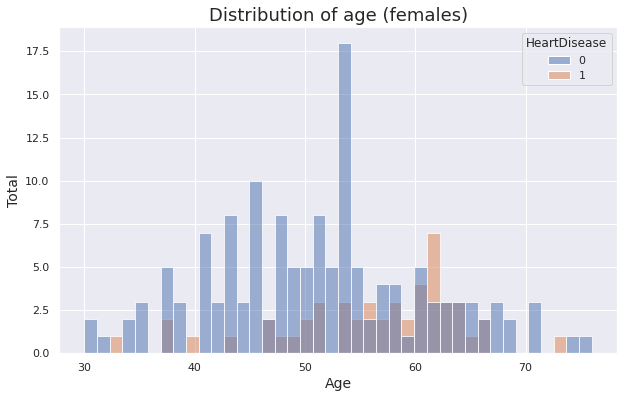

In [235]:
ax = sns.histplot(data = dataset.query('Sex == 1'), x = 'Age', hue = 'HeartDisease', bins = 40, color='r')
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of age (females)', fontsize = 18)
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

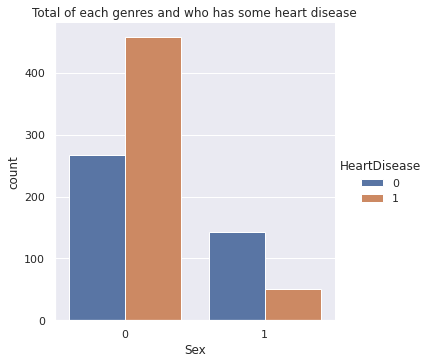

In [236]:
ax = sns.catplot(x='Sex', data=dataset, kind='count', hue='HeartDisease').set(title = 'Total of each genres and who has some heart disease')

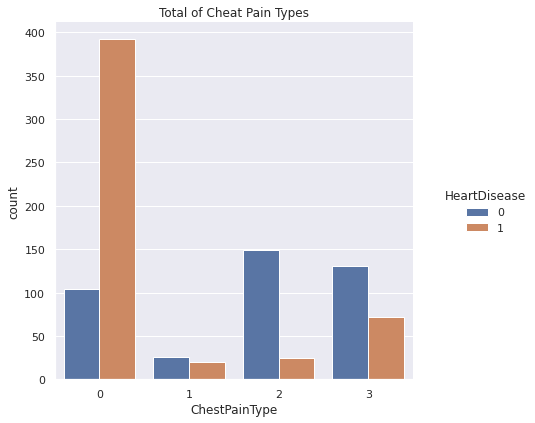

In [237]:
ax = sns.catplot(x='ChestPainType', data=dataset, kind='count', hue='HeartDisease').set(title = 'Total of Cheat Pain Types')
ax.figure.set_size_inches(8, 6)

Text(0, 0.5, 'Total')

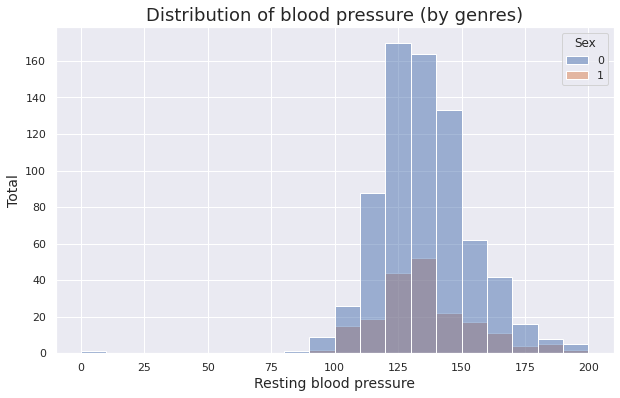

In [238]:
ax = sns.histplot(data = dataset, x = 'RestingBP', hue = 'Sex', bins = 20)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of blood pressure (by genres)', fontsize = 18)
ax.set_xlabel('Resting blood pressure', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

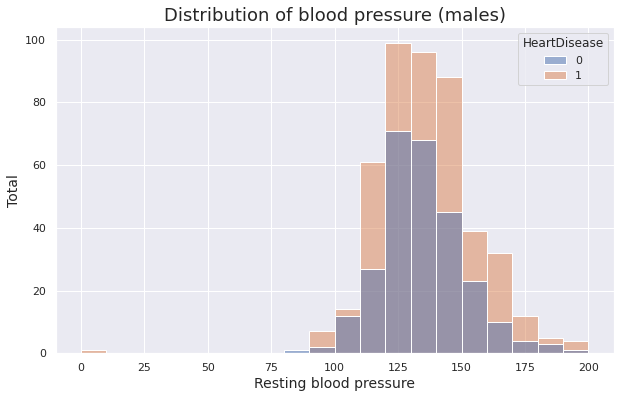

In [239]:
ax = sns.histplot(data = dataset.query('Sex == 0'), x = 'RestingBP', hue = 'HeartDisease', bins = 20)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of blood pressure (males)', fontsize = 18)
ax.set_xlabel('Resting blood pressure', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

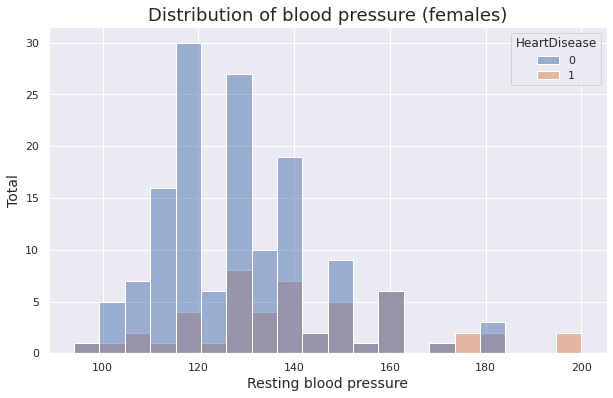

In [240]:
ax = sns.histplot(data = dataset.query('Sex == 1'), x = 'RestingBP', hue = 'HeartDisease', bins = 20)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of blood pressure (females)', fontsize = 18)
ax.set_xlabel('Resting blood pressure', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

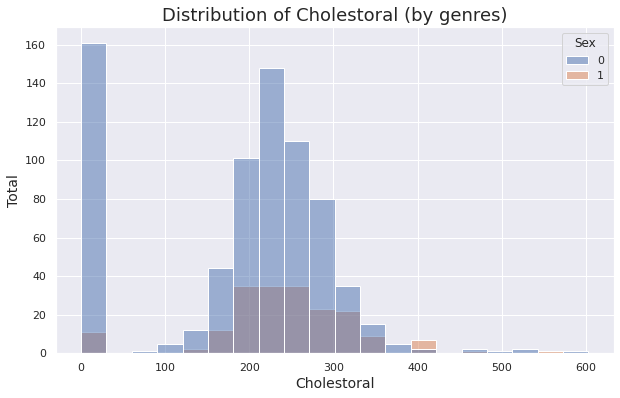

In [241]:
ax = sns.histplot(data = dataset, x = 'Cholesterol', hue='Sex' ,bins = 20, color = 'g')
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Cholestoral (by genres)', fontsize = 18)
ax.set_xlabel('Cholestoral', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

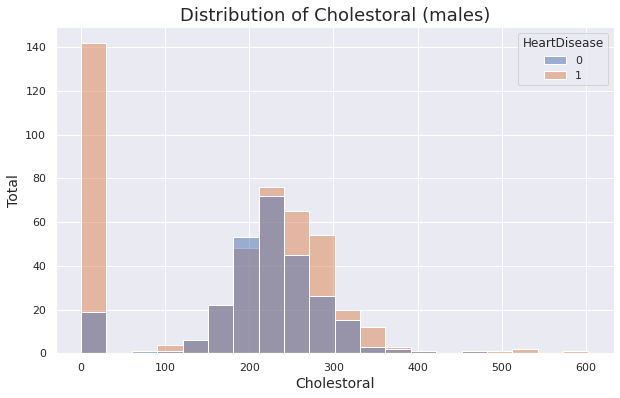

In [242]:
ax = sns.histplot(data = dataset.query('Sex == 0'), x = 'Cholesterol', hue='HeartDisease' ,bins = 20, color = 'g')
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Cholestoral (males)', fontsize = 18)
ax.set_xlabel('Cholestoral', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

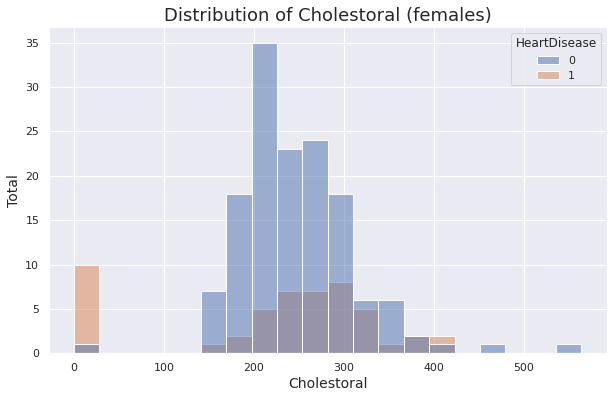

In [243]:
ax = sns.histplot(data = dataset.query('Sex == 1'), x = 'Cholesterol', hue='HeartDisease' ,bins = 20, color = 'g')
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Cholestoral (females)', fontsize = 18)
ax.set_xlabel('Cholestoral', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

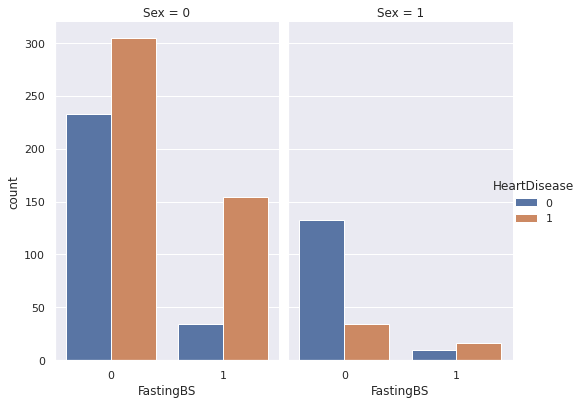

In [244]:
#Total of people with blood sugar over 120 mg/dl
ax = sns.catplot(data=dataset, x='FastingBS',col = 'Sex', kind='count', hue='HeartDisease')
ax.figure.set_size_inches(8, 6)

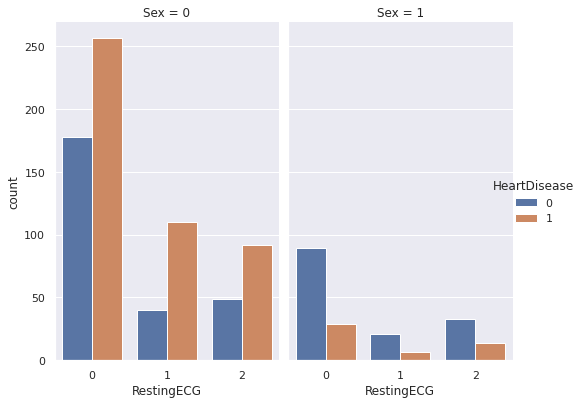

In [245]:
#Resting electrocardiographic results
ax = sns.catplot(x='RestingECG', col = 'Sex', data=dataset, kind='count', hue='HeartDisease')
ax.figure.set_size_inches(8, 6)

Text(0, 0.5, 'Total')

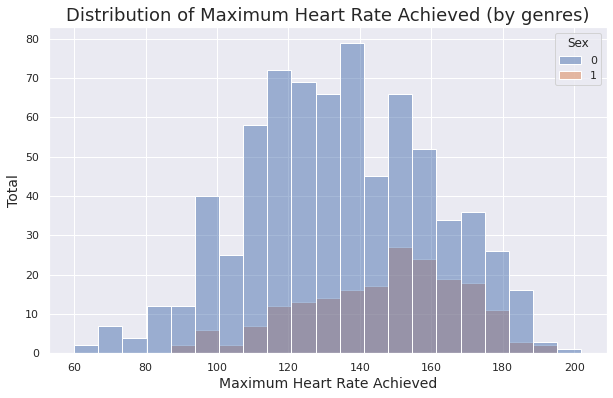

In [246]:
ax = sns.histplot(data = dataset, x = 'MaxHR', hue = 'Sex', bins = 21)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Maximum Heart Rate Achieved (by genres)', fontsize = 18)
ax.set_xlabel('Maximum Heart Rate Achieved', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

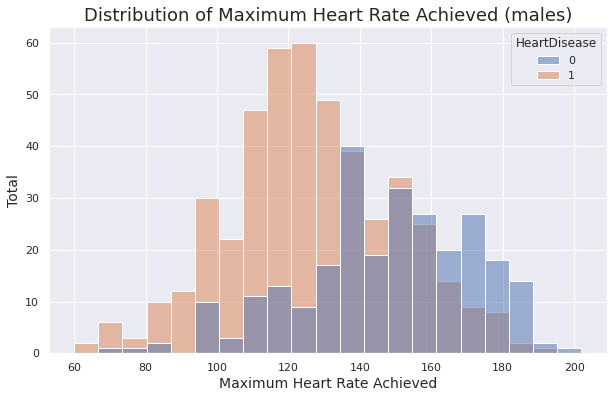

In [247]:
ax = sns.histplot(data = dataset.query('Sex == 0'), x = 'MaxHR', hue = 'HeartDisease', bins = 21)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Maximum Heart Rate Achieved (males)', fontsize = 18)
ax.set_xlabel('Maximum Heart Rate Achieved', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

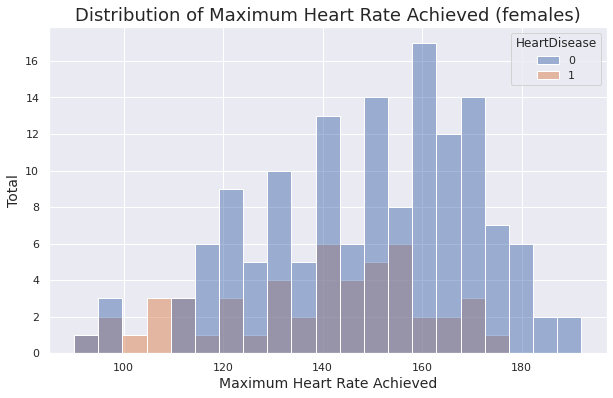

In [248]:
ax = sns.histplot(data = dataset.query('Sex == 1'), x = 'MaxHR', hue = 'HeartDisease', bins = 21)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Maximum Heart Rate Achieved (females)', fontsize = 18)
ax.set_xlabel('Maximum Heart Rate Achieved', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

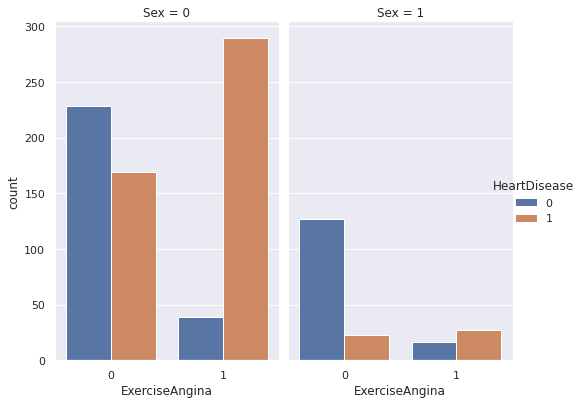

In [249]:
#Total of exercise induced angina
ax = sns.catplot(x='ExerciseAngina',col = 'Sex', data=dataset, kind='count', hue='HeartDisease')
ax.figure.set_size_inches(8, 6)

Text(0, 0.5, 'Total')

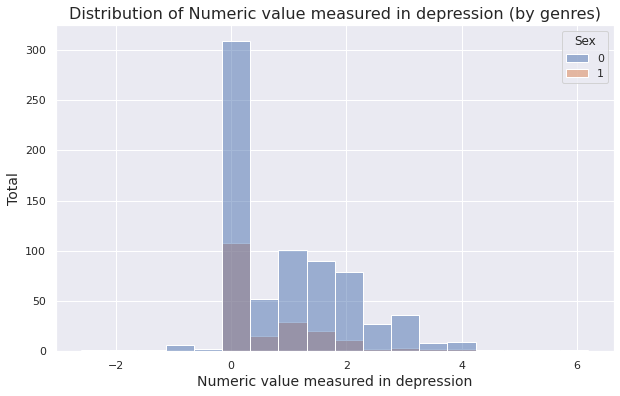

In [250]:
ax = sns.histplot(data = dataset, x = 'Oldpeak', hue = 'Sex', bins = 18)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Numeric value measured in depression (by genres)', fontsize = 16)
ax.set_xlabel('Numeric value measured in depression', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

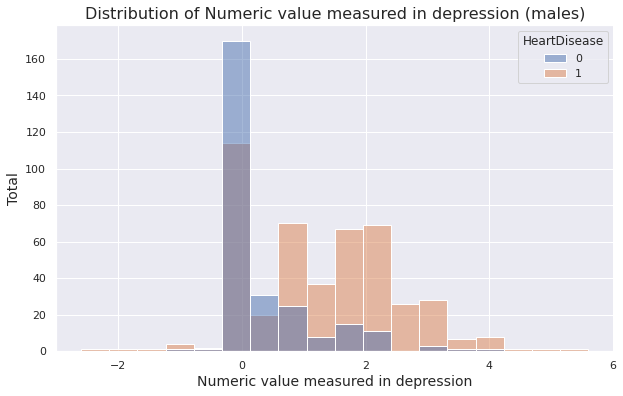

In [251]:
ax = sns.histplot(data = dataset.query('Sex == 0'), x = 'Oldpeak', hue = 'HeartDisease', bins = 18)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Numeric value measured in depression (males)', fontsize = 16)
ax.set_xlabel('Numeric value measured in depression', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

Text(0, 0.5, 'Total')

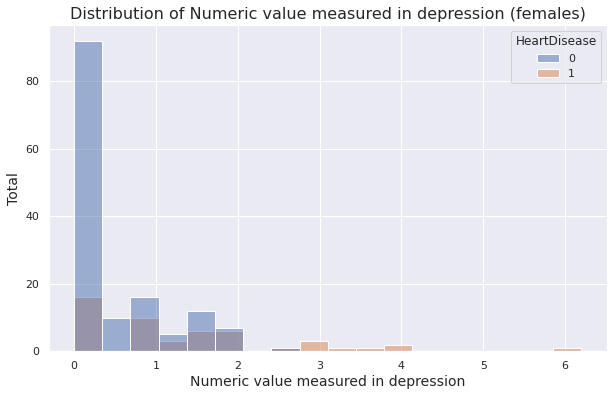

In [252]:
ax = sns.histplot(data = dataset.query('Sex == 1'), x = 'Oldpeak', hue = 'HeartDisease', bins = 18)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribution of Numeric value measured in depression (females)', fontsize = 16)
ax.set_xlabel('Numeric value measured in depression', fontsize = 14)
ax.set_ylabel('Total', fontsize = 14)

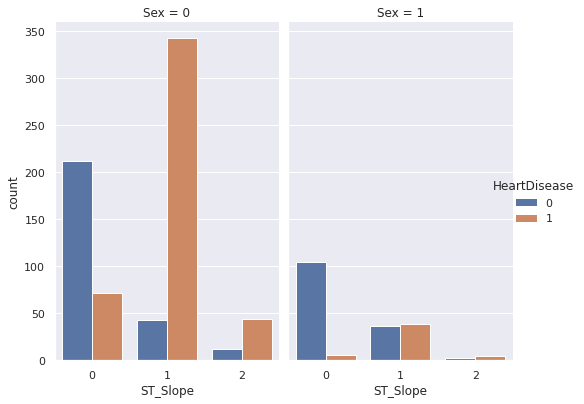

In [253]:
#Total of classification the slope of the peak exercise ST
ax = sns.catplot(x='ST_Slope', data=dataset, col = "Sex", kind='count', hue='HeartDisease')
ax.figure.set_size_inches(8, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total of heart disease')

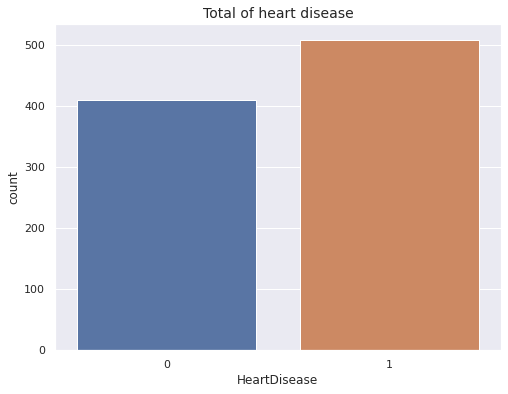

In [254]:
ax = sns.countplot(dataset['HeartDisease'])
ax.figure.set_size_inches(8, 6)
ax.set_title("Total of heart disease", fontsize = 14)

Text(0.5, 1.0, 'Correlation Matriz')

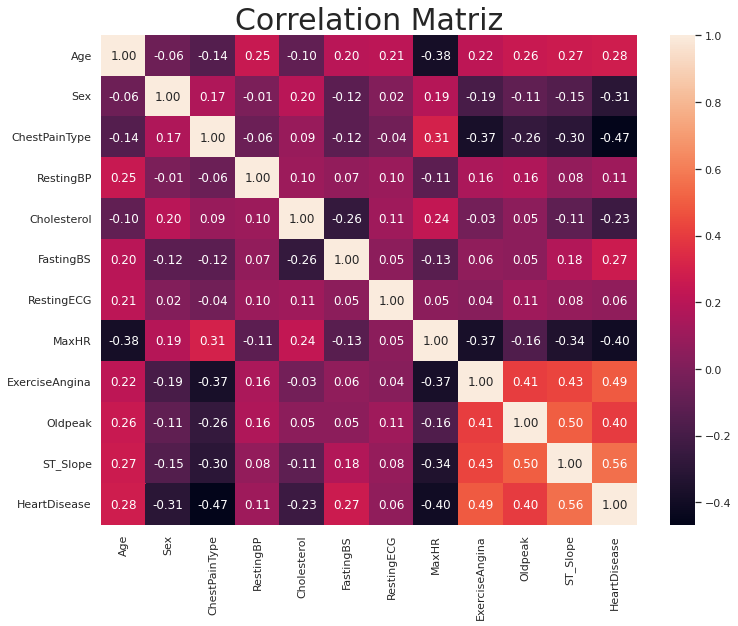

In [255]:
corr = dataset.corr()
ax = sns.heatmap(corr, annot = True, fmt = '.2f')
ax.figure.set_size_inches(12, 9)
ax.set_title('Correlation Matriz', fontsize = 30)

In [256]:
dataset2 = dataset.copy()
dataset2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,0,0
1,49,1,3,160,180,0,0,156,0,1.0,1,1
2,37,0,2,130,283,0,1,98,0,0.0,0,0
3,48,1,0,138,214,0,0,108,1,1.5,1,1
4,54,0,3,150,195,0,0,122,0,0.0,0,0


In [257]:
ohe = OneHotEncoder(dtype = int)
ChestPainType_ohe = ohe.fit_transform(dataset[['ChestPainType']]).toarray()
dataset2 = dataset.drop(['ChestPainType', 'RestingECG', 'ST_Slope'], axis = 1)
dataset2 = pd.concat([dataset2, pd.DataFrame(ChestPainType_ohe, columns = ohe.get_feature_names_out(['ChestPainType']))], axis = 1)


In [258]:
RestingECG_ohe = ohe.fit_transform(dataset[['RestingECG']]).toarray()
dataset2 = pd.concat([dataset2, pd.DataFrame(RestingECG_ohe, columns = ohe.get_feature_names_out(['RestingECG']))], axis = 1)

In [259]:
ST_Slope_ohe = ohe.fit_transform(dataset[['ST_Slope']]).toarray()
dataset2 = pd.concat([dataset2, pd.DataFrame(ST_Slope_ohe, columns = ohe.get_feature_names_out(['ST_Slope']))], axis = 1)

In [260]:
dataset2.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,0,140,289,0,172,0,0.0,0,0,0,1,0,1,0,0,1,0,0
1,49,1,160,180,0,156,0,1.0,1,0,0,0,1,1,0,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,0,1,0,0,1,0,1,0,0
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,1,0,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,0,1,1,0,0,1,0,0


Text(0.5, 1.0, 'Correlation Matriz')

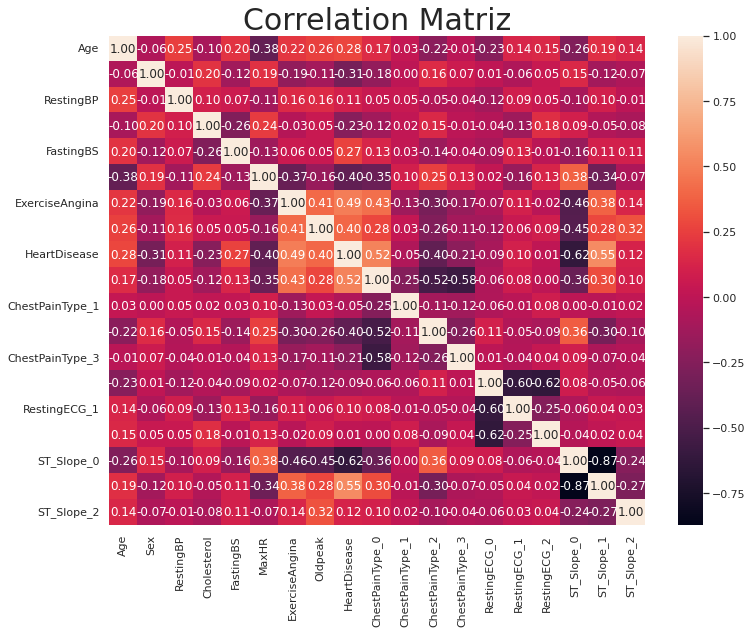

In [261]:
corr2 = dataset2.corr()
ax = sns.heatmap(corr2, annot = True, fmt = '.2f')
ax.figure.set_size_inches(12, 9)
ax.set_title('Correlation Matriz', fontsize = 30)

In [262]:
data_x = dataset2.drop('HeartDisease', axis = 1)
data_y = dataset2['HeartDisease']

In [263]:
standardizer = StandardScaler()
dataset_standard = standardizer.fit_transform(data_x)

In [264]:
seed = 1234
random_state = seed

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, stratify = data_y, random_state = seed)

[Text(30.5, 0.5, 'Real'), Text(0.5, 30.5, 'Prediction')]

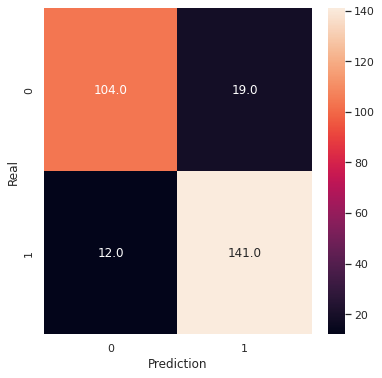

In [265]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
predicted_bnb = bnb.predict(X_test)

accuracy_bnb = accuracy_score(y_test, predicted_bnb)
precision_bnb = precision_score(y_test, predicted_bnb)
recall_bnb = recall_score(y_test, predicted_bnb)
f1_score_bnb = f1_score(y_test, predicted_bnb)

confusion_matrix = confusion_matrix(y_test, predicted_bnb)
plt.figure(figsize = (6, 6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = "Prediction", ylabel = "Real")

[Text(30.5, 0.5, 'Real'), Text(0.5, 30.5, 'Prediction')]

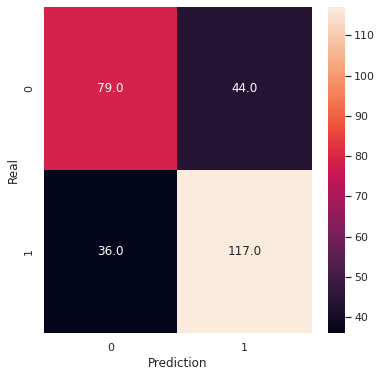

In [266]:
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, predicted_knn)
precision_knn = precision_score(y_test, predicted_knn)
recall_knn = recall_score(y_test, predicted_knn)
f1_score_knn = f1_score(y_test, predicted_bnb)

confusion_matrix = confusion_matrix(y_test, predicted_knn)
plt.figure(figsize = (6, 6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = "Prediction", ylabel = "Real")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[Text(30.5, 0.5, 'Real'), Text(0.5, 30.5, 'Prediction')]

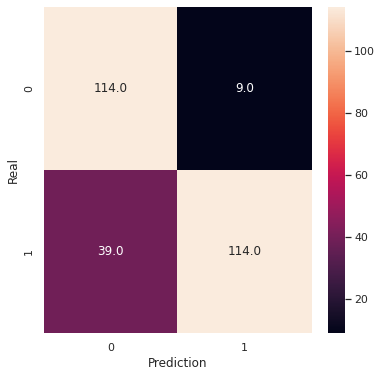

In [267]:
from sklearn.metrics import confusion_matrix

model = LinearSVC(random_state=1234)
model.fit(X_train, y_train)
predicted_svc = model.predict(X_test)

accuracy_svc = accuracy_score(y_test, predicted_svc)
precision_svc = precision_score(y_test, predicted_svc)
recall_svc = recall_score(y_test, predicted_svc)
f1_score_svc = f1_score(y_test, predicted_svc)

confusion_matrix = confusion_matrix(y_test, predicted_svc)
plt.figure(figsize = (6, 6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = "Prediction", ylabel = "Real")

[Text(30.5, 0.5, 'Real'), Text(0.5, 30.5, 'Prediction')]

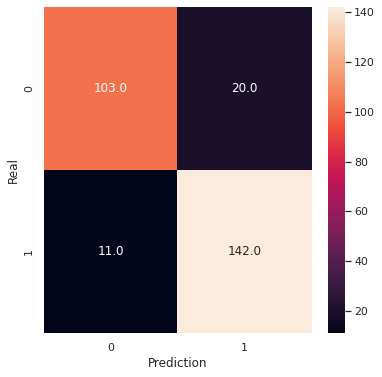

In [268]:
from sklearn.metrics import confusion_matrix

classificator = RandomForestClassifier(n_estimators = 20, random_state = 1234) 
classificator.fit(X_train, y_train)

accuracy_rfc = accuracy_score(y_test, classificator.predict(X_test))
precision_rfc = precision_score(y_test, classificator.predict(X_test))
recall_rfc = recall_score(y_test, classificator.predict(X_test))
f1_score_rfc = f1_score(y_test, classificator.predict(X_test))

confusion_matrix = confusion_matrix(y_test, classificator.predict(X_test))
plt.figure(figsize = (6, 6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = "Prediction", ylabel = "Real")

[Text(30.5, 0.5, 'Real'), Text(0.5, 30.5, 'Prediction')]

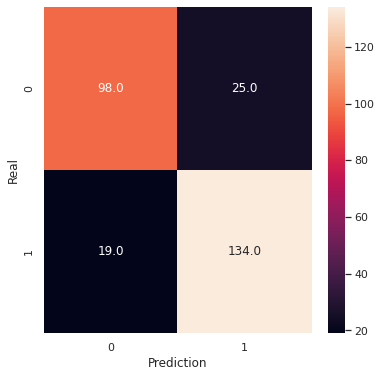

In [269]:
from sklearn.metrics import confusion_matrix

dtc = DecisionTreeClassifier(criterion='entropy', random_state = 1234)
dtc.fit(X_train, y_train)
predicted_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, predicted_dtc)
precision_dtc = precision_score(y_test, predicted_dtc)
recall_dtc = recall_score(y_test, predicted_dtc)
f1_score_dtc = f1_score(y_test, predicted_dtc)

confusion_matrix = confusion_matrix(y_test, predicted_dtc)
plt.figure(figsize = (6, 6))
sns.set(font_scale = 1)
sns.heatmap(confusion_matrix, annot = True, fmt = '.1f').set(xlabel = "Prediction", ylabel = "Real")

In [270]:
data = {'BernoulliNB' : [accuracy_bnb, precision_bnb, recall_bnb, f1_score_bnb],
        'KNeighborsClassifier' : [accuracy_knn, precision_knn, recall_knn, f1_score_knn],
        'LinearSVC' : [accuracy_svc, precision_svc, recall_svc, f1_score_svc],
        'RandomForestClassifier' : [accuracy_rfc, precision_rfc, recall_rfc, f1_score_rfc],
        'DecisionTreeClassifier' : [accuracy_dtc, precision_dtc, recall_dtc, f1_score_dtc]}

confusion_matrix_metrics = pd.DataFrame(data, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])

confusion_matrix_metrics

,BernoulliNB,KNeighborsClassifier,LinearSVC,RandomForestClassifier,DecisionTreeClassifier
Accuracy,0.887681,0.710145,0.826087,0.887681,0.840580
Precision,0.881250,0.726708,0.926829,0.876543,0.842767
Recall,0.921569,0.764706,0.745098,0.928105,0.875817
F1-Score,0.900958,0.900958,0.826087,0.901587,0.858974


In [271]:
bnb_auc = roc_auc_score(y_test, predicted_bnb)
knn_auc = roc_auc_score(y_test, predicted_knn)
svc_auc = roc_auc_score(y_test, predicted_svc)
rfc_auc = roc_auc_score(y_test, classificator.predict(X_test))
dtc_auc = roc_auc_score(y_test, predicted_dtc)
bnb_fpr, bnb_tpr, bnb_thresholds = roc_curve(y_test, predicted_bnb)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, predicted_knn)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, predicted_svc)
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, classificator.predict(X_test))
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, predicted_dtc)

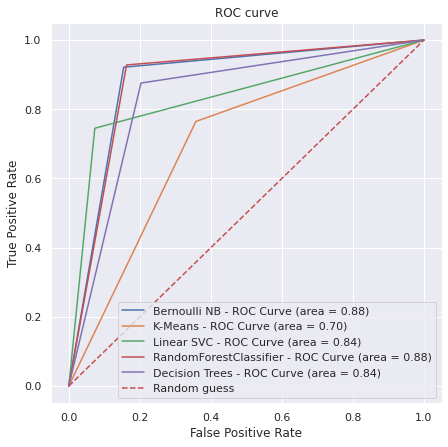

In [272]:
plt.figure(figsize = (7, 7))
plt.plot(bnb_fpr, bnb_tpr, label = 'Bernoulli NB - ROC Curve (area = %.2f)' %bnb_auc)
plt.plot(knn_fpr, knn_tpr, label = 'K-Means - ROC Curve (area = %.2f)' %knn_auc)
plt.plot(svc_fpr, svc_tpr, label = 'Linear SVC - ROC Curve (area = %.2f)' %svc_auc)
plt.plot(rfc_fpr, rfc_tpr, label = 'RandomForestClassifier - ROC Curve (area = %.2f)' %rfc_auc)
plt.plot(dtc_fpr, dtc_tpr, label = 'Decision Trees - ROC Curve (area = %.2f)' %dtc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'r', label = 'Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

# **Conclusion**

Summarising, the best models used were the Bernoulli Naive Bayes and Random Forest Classifier, show almost 90% of our predictions.